### Student Information
Name: 黃星翰

Student ID: 112062627

GitHub ID: FrHTaTe

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [167]:
### Begin Assignment Here

# Load all needed libraries in this homework
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn import preprocessing
import nltk
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.frequentPattern.basic import FPGrowth as alg

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Set the style I'm going to use for plotting 
sns.set_style("dark")
sns.set_palette("pastel")

# 1. Data Preparatopn

In [168]:
# Import the assigned dataset and display it
dataset = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

display(dataset)

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [169]:
# Check all the categories
categories = list(set(dataset["sentiment"]))
print(categories)

['nostalgia', 'not nostalgia']


# 2. Preprocess the data

## 2.1 Data Cleaning
1. Check if there is missing value, then deal with it.    
2. Check if there is duplicated record, then delete it.
3. Show the statistics of the dataset after cleaning.

In [170]:
# Check if there are any missing values and duplicated record in each fields
print(f"The amount of missing value is: \n{dataset.isnull().sum()}\n")
print(f"The amount of duplicated record is: \n{dataset.duplicated().sum()}\n")
print(f"The amount of duplicated comment is: \n{dataset.duplicated('comment').sum()}")

The amount of missing value is: 
sentiment    0
comment      0
dtype: int64

The amount of duplicated record is: 
1

The amount of duplicated comment is: 
1


In [171]:
# We can see that there are duplicated records in the dataset, so I'm going to drop it
for index, duplicate in enumerate(dataset.duplicated(keep=False)):
    if duplicate == True: print(f"The {index}th record is duplicated!")

print(f"\nThe duplicated record is:")
display(dataset[dataset.duplicated(keep=False)])

# drop the duplicated records
dataset.drop_duplicates(inplace=True, ignore_index=True)

# Show the shape of the dataset after dropping the duplicated records
print("After dropping the duplicated records, the shape of dataset is:")
display(dataset)


The 62th record is duplicated!
The 78th record is duplicated!

The duplicated record is:


,sentiment,comment
62,not nostalgia,never heard this song before... WOW What an am...
78,not nostalgia,never heard this song before... WOW What an am...


After dropping the duplicated records, the shape of dataset is:


,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1494,not nostalgia,"i don't know!..but the opening of the video,....."
1495,not nostalgia,it's sad this is such a beautiful song when yo...
1496,not nostalgia,"Dear Friend, I think age and time is not that ..."
1497,nostalgia,I was born in 1954 and started to be aware of ...


The amounts of each category are:
sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


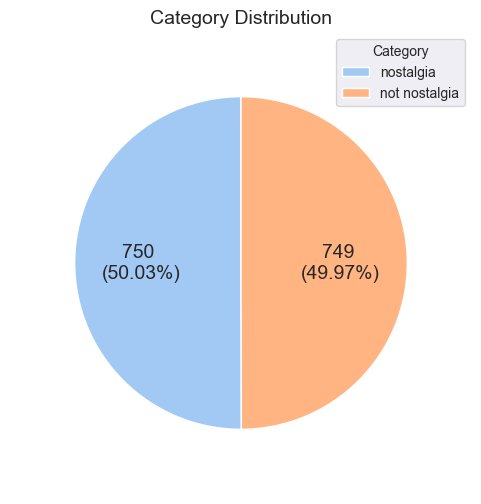

In [172]:
# Show the statistics of the dataset after cleaning
print("The amounts of each category are:")
print(dataset["sentiment"].value_counts())

# Plot the distribution of the categories by pie chart
plt.figure(figsize=(6, 6))

'''
'autopct' will get the percentage of each category,
and I want to display the number of each category in the pie chart,
so I use the lambda function to calculate the number of each category.
'''
plt.pie(
    dataset["sentiment"].value_counts(),
    autopct=lambda p: f"{int(p * sum(dataset['sentiment'].value_counts()) / 100)} \n" \
                      f"({p:.2f}%)",
    textprops={'size':14},
    startangle=90, # set the start angle of the pie chart (then it will plot counterclockwisly)
    radius=0.9
)

plt.legend(
    dataset["sentiment"].value_counts().index, 
    title="Category",
    loc="upper right",
)

plt.title("Category Distribution", fontsize=14)

plt.show()
 

## 2.2 Feature Creation
Since only using comments to do analysis is not easy to observe the feature of the dataset, so we can tokenize the comments to have more insights of the data.

In [173]:
# I copy the 'tokenize_text' function from 'helpers.data_mining_helpers.py' in Master file to tokenize the text.
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

dataset['token'] = dataset['comment'].apply(nltk.word_tokenize)

print(dataset['token'])

0       [He, was, a, singer, with, a, golden, voice, t...
1       [The, mist, beautiful, voice, ever, I, listene...
2       [I, have, most, of, Mr., Reeves, songs, ., Alw...
3       [30, day, leave, from, 1st, tour, in, Viet, Na...
4       [listening, to, his, songs, reminds, me, of, m...
                              ...                        
1494    [i, do, n't, know, !, .., but, the, opening, o...
1495    [it, 's, sad, this, is, such, a, beautiful, so...
1496    [Dear, Friend, ,, I, think, age, and, time, is...
1497    [I, was, born, in, 1954, and, started, to, be,...
1498    [This, is, the, first, CD, I, bought, after, m...
Name: token, Length: 1499, dtype: object


## 2.3 Feature Subset Selection
After tokenizing the comments, we can calculate the frequency for each term that the times it occurs in each document, so we can do analysis on it.  
But both the number of documents and number of terms is too huge to visulize, so we can do feature subset selection to obeserve part of the matrix. 

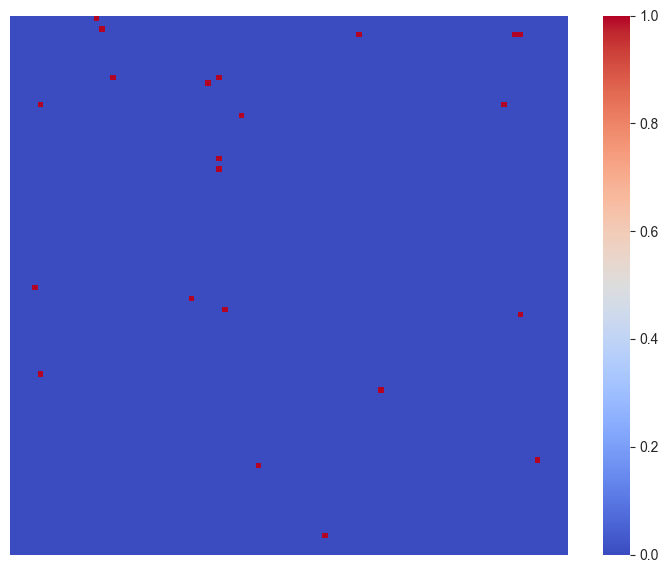

In [174]:
# Generate the document-term matrix for the dataset
dtm_vectorizer = CountVectorizer()
dataset_dtm = dtm_vectorizer.fit_transform(dataset['comment'])

# Visulize the first 100*100 elements of dataset_dtm
plt.figure(figsize=(9, 7))
sns.heatmap(
    dataset_dtm[:100, :100].toarray(),
    cmap="coolwarm",
    vmin=0, 
    vmax=max(dataset_dtm[:100, :100].toarray().flatten()), 
    xticklabels = False, 
    yticklabels = False
)
plt.show()

## 2.4 Aggregation
Observe the map above, we can see that the sparsity of DTM, so we might need to see the dataset in another point of view. One intuitive way is to calculate the frequency of each terms that it occurs in the whole corpus, that is, we can aggregate the whole objects to see the amount of each term frequency.

In [175]:
'''
Count the term frequency of each term in the dataset, 
then get the index from the most frequent term to the least frequent term.
'''
term_freq = np.asarray(dataset_dtm.sum(axis=0))[0]
sorted_tf_index = sorted(range(len(term_freq)), key=lambda k: term_freq[k], reverse=True)

# Visulize for the first 300 frequent terms
fig = px.bar(
        x=dtm_vectorizer.get_feature_names_out()[sorted_tf_index[:300]],
        y=term_freq[sorted_tf_index[:300]],
        labels={'x':'Term', 'y':'Frequency'},
)
fig.update_layout(xaxis_title="Terms",
                  yaxis_title="Frequency")
fig.show()


## 2.5 Attribute Transformation
However, the variance of the term frequency is quite high, it may make people misinterprete the data or miss some infromation from a graph. So we can try to do logarithmic transformation to if there is any other pattern in the dataset.

In [176]:
term_log_freq = np.array([math.log(tf) for tf in term_freq])

fig = px.bar(
        x=dtm_vectorizer.get_feature_names_out()[sorted_tf_index[:300]],
        y=term_log_freq[sorted_tf_index[:300]],
        labels={'x':'Term', 'y':'Log(Frequency)'},
)
fig.update_layout(xaxis_title="Terms",
                  yaxis_title="Log(Frequency)")
fig.show()

# 3. Data Mining

## 3.1 Separate Each Category (Preprocessing)
Since we want to classify the category for each comments, so we may want to separate dataset by predefined categories to help us mining the pattern for each category.

In [177]:
# Create document-term matrix DataFrame for each category
def create_DTM_df(df):
    dtm_vectorizer = CountVectorizer()
    dataset_dtm = dtm_vectorizer.fit_transform(df['comment'])
    
    # Get the unique words (vocabulary) from the vectorizer
    words = dtm_vectorizer.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    DTM = pd.DataFrame(dataset_dtm.toarray(), columns=words)
    
    return DTM

# Create df for each category
dfs = {}

for category in categories:
    dfs[category] = dataset[dataset['sentiment'] == category].copy()

# Create DTM DataFrames for each category
dtms = {}

for category in categories:
    dtms[category] = create_DTM_df(dfs[category])

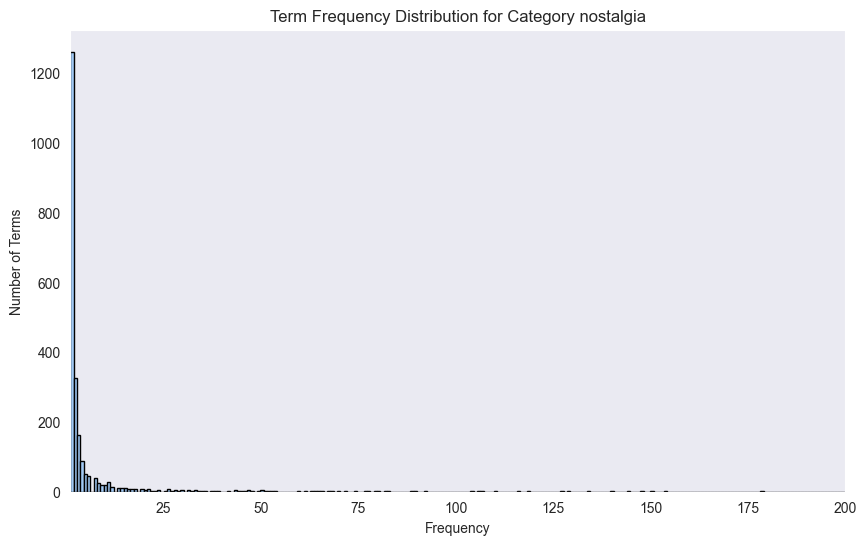

In [178]:
category_number = 0 # 0 or 1

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))

# data: the frequencies of each term that appears in the category
plt.hist(
    dtms[categories[category_number]].sum(axis=0).to_numpy(), 
    bins=750,
    edgecolor='black'
)

plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200) # only show frequencies [1, 200)

plt.show()

## 3.2 Noise Reduction (Preprocessing)
In the graph shown above, we can see that there are still many outliers in each category, that would affect our classfication. So we should remove some of them.  
Here, I remove the top **1%** and the bottom **50%** of terms.

In [179]:
 # Filter the top 1% and bottom 50% words based on their amount across all documents
def noise_reduction(DTM, top_percent = 0.01, bottom_percent = 0.5):
    # Calculate the amount of each word across all documents
    word_amount = DTM.sum(axis=0)
    
    # Sort the words by their amount
    sorted_words = word_amount.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 1% and bottom 50%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent * 100}% words: \n{sorted_words.head(bottom_n)}') #H ere we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent * 100}% words: \n{sorted_words.tail(top_n)}') # Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return DTM.drop(columns=words_to_remove)

# filter the noise for each category
filtered_dtms = {}

for category in categories:
    print(f'\nFor category {category} we filtered the following words:')
    filtered_dtms[category] = noise_reduction(dtms[category])


For category nostalgia we filtered the following words:
Bottom 50.0% words: 
yo           1
yet          1
yester       1
yeas         1
yearn        1
            ..
known        1
knowledge    1
learning     1
sept         1
separate     1
Length: 1147, dtype: int64
Top 1.0% words: 
you         129
time        134
for         140
love        144
on          148
that        150
years       154
so          179
when        226
memories    240
back        272
me          300
it          318
in          349
of          361
was         432
song        440
and         472
to          543
this        545
my          566
the         643
dtype: int64

For category not nostalgia we filtered the following words:
Bottom 50.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
            ..
lifetime     1
lies         1
lie          1
levis        1
levi         1
Length: 1301, dtype: int64
Top 1.0% words: 
what      92
all       98
great    103
with     106
he   

## 3.3 Frequent Pattern Mining
Now, we have made a dataset clean enough. We can start mining.

### 3.3.1 Build up Database
We should convert the dataset into Transaction database so that PAMI can work on it.  
We set transaction threshold to be 1, so each trasaction (= document) consists of items ( = word) that occur at least once (in whole vocabulary for that category).

Statistics for td_clean_nostalgia.csv:
Database size (total no of transactions) : 750
Number of items : 1126
Minimum Transaction Size : 1
Average Transaction Size : 13.253333333333334
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 9.049336378369901
Variance in Transaction Sizes : 81.99982198486872
Sparsity : 0.9882297217288336

Statistics for td_clean_not_nostalgia.csv:
Database size (total no of transactions) : 749
Number of items : 1275
Minimum Transaction Size : 1
Average Transaction Size : 12.423230974632844
Maximum Transaction Size : 49
Standard Deviation Transaction Size : 6.8805210413981985
Variance in Transaction Sizes : 47.404860669841426
Sparsity : 0.9902562894316606



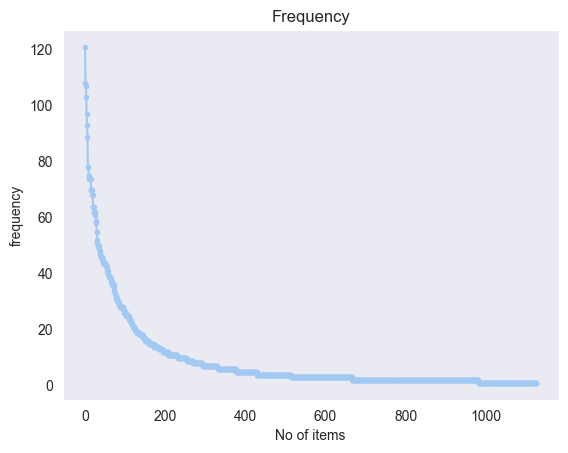

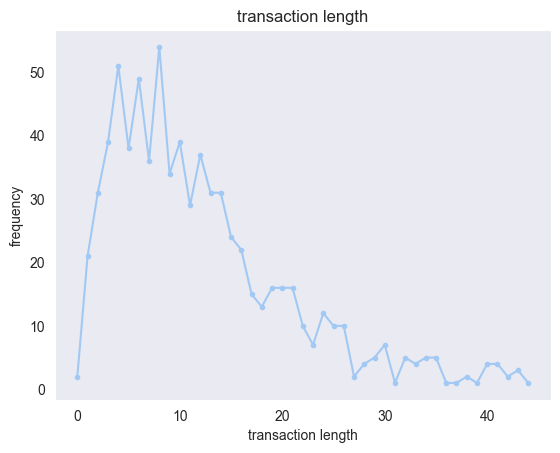

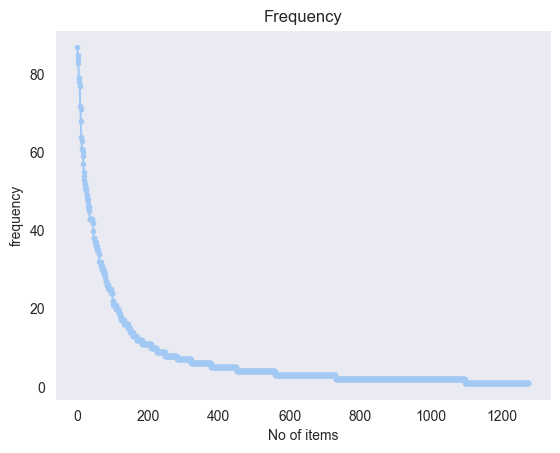

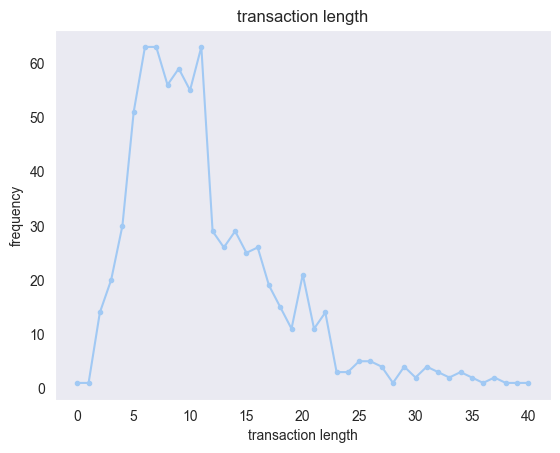

In [180]:
# Loop through the dictionary of term-document DataFrames
for category in filtered_dtms:
    # Replace space with underscore
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(filtered_dtms[category])                 
    
    # Save the transactional database to a CSV file
    obj.convert2TransactionalDatabase(f'td_clean_{category_safe}.csv', '>=', 1)

    # Load the transactional database and print the statistics
    obj = tds.TransactionalDatabase(f'td_clean_{category_safe}.csv')
    print(f"Statistics for td_clean_{category_safe}.csv:")
    obj.run()
    obj.printStats()
    print()
    obj.plotGraphs()

### 3.3.2 Run FPGrowth algotihm
We can utilize FPGrowth to help us find the frequent patterns for each category.  
Set minSup = 18, because it seems to be a nice cut point for each category in the first graph.

In [181]:
# Find the freqient patterns for each category
minSup = 18

obj = alg.FPGrowth(iFile=f'td_clean_not_nostalgia.csv', minSup = minSup)
obj.mine() 
obj.save('freq_patterns_not_nostalgia.txt') # save the patterns
fp_df_not_nostalgia = obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(fp_df_not_nostalgia ))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
print()

obj = alg.FPGrowth(iFile=f'td_clean_nostalgia.csv', minSup = minSup)
obj.mine() 
obj.save('freq_patterns_nostalgia.txt') # save the patterns
fp_df_nostalgia = obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(fp_df_nostalgia ))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 131
Runtime: 0.016635417938232422

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 172
Runtime: 0.018349647521972656


In [182]:
fp_df_nostalgia

,Patterns,Support
0,teenager,18
1,heart,18
2,record,18
3,60,18
4,get,18
...,...,...
167,with old,20
168,with remember,26
169,old,108
170,old remember,23


In [183]:
fp_df_not_nostalgia

,Patterns,Support
0,back,18
1,greatest,18
2,makes,18
3,age,19
4,young,19
...,...,...
126,be,79
127,me,83
128,on,84
129,can,85


### 3.3.3 Find Unique Pattern
We should filter the pattern that are specific to the category to help us do classification.

In [184]:
# We group together all of the dataframes related to our found patterns
fp_dfs = [fp_df_not_nostalgia, fp_df_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in fp_dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1} # datatype: set

# Calculate the total number of patterns across all categories (including duplicates)
total_patterns_count = sum(len(df) for df in fp_dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_fp_dfs = []
for df in fp_dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_fp_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_fp_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

       Patterns  Support
134    remember      121
130        with      107
129      brings      103
126          is       97
125       great       93
..          ...      ...
99      he with       18
105   just with       18
104     have is       18
108   good days       18
123  music with       18

[135 rows x 2 columns]
Number of patterns discarded: 168


Then we can concatenate the final patterns to our the DTM of our dataset.

In [185]:
# Convert 'text' column into DTM
dtm_vectorizer = CountVectorizer()
dataset_dtm = dtm_vectorizer.fit_transform(dataset['comment'])
terms = dtm_vectorizer.get_feature_names_out()

# Tokenize the sentences into sets of unique words
dataset['tokenized_text'] = dataset['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=dataset.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = dataset['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the DTM to a DataFrame for easy merging
dtm_df = pd.DataFrame(dataset_dtm.toarray(), columns=terms, index=dataset.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([dtm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,back,teenager,oh,60,record,he with,just with,have is,good days,music with
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.4 Visualization with Dimensionality Reduction
We could use dimensionality reduction tools, like t-SNE, to help us see the similarity of the data.

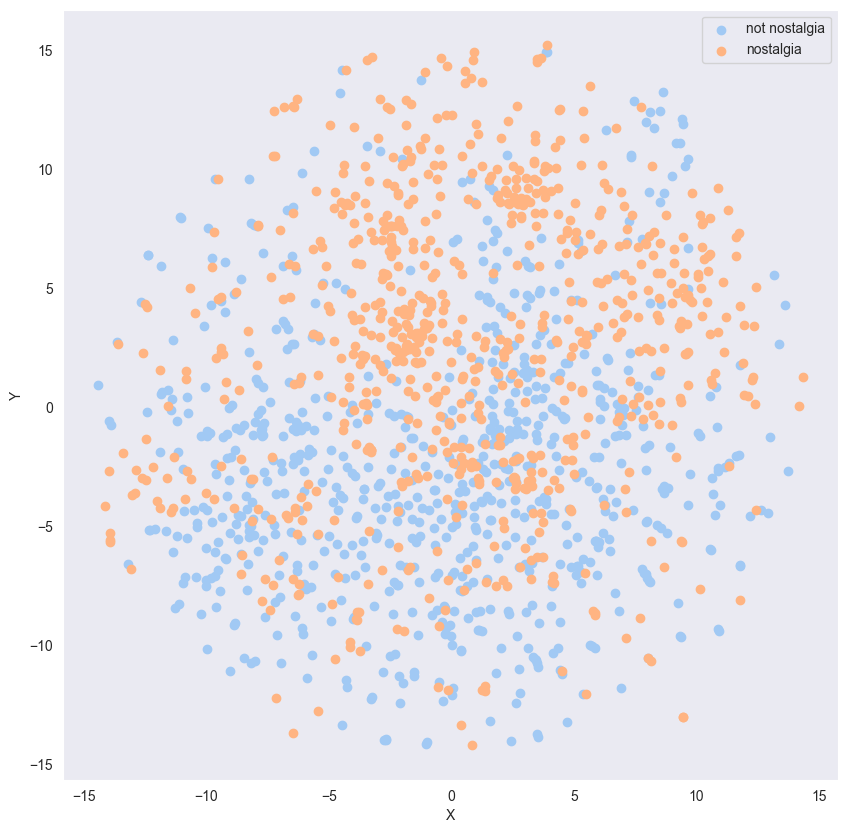

In [186]:
# calculate the t-SNE for the DTM
dtm_tsne = TSNE(n_components=2).fit_transform(augmented_df.values)
# get the cate
categories = dataset['sentiment'].unique() 
plt.figure(figsize=(10, 10))

for category in categories:
    plt.scatter(
        dtm_tsne[dataset['sentiment'] == category].T[0],
        dtm_tsne[dataset['sentiment'] == category].T[1],
        marker='o',
        label=category,
    )

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')

plt.show()

## 3.5 Binarization
To make our category could fit most classification algorithm, we can do the binarization.

In [187]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(dataset['sentiment'])
dataset['label'] = mlb.transform(dataset['sentiment'])

display(dataset)

,sentiment,comment,token,tokenized_text,label
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{voice, I, Although, his, time., singers, now,...",1
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{voice, I, his, Never, a, love, The, ever, sti...",0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{like, loving, I, but, his, were, grew, 17., g...",0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{47, I, granted, blessing, life, 1st, are, fro...",1
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{mum, his, listening, me, everyday, who, to, r...",0
...,...,...,...,...,...
1494,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o...","{Simmons, going, that, as, him,..would, thing,...",1
1495,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so...","{feel.., really, sad, a, song, love, this, how...",1
1496,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is...","{like, I, comes, think, that, this, not, time,...",1
1497,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,...","{voice, I, presentation,, his, really, and,, o...",0


# 4. Data Classification

## 4.1 Split the Dataset

In [188]:
# Create a mapping from numerical labels to category names
category_mapping = dict(dataset[['label', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
data_train, data_test, label_train, label_test = train_test_split(augmented_df, dataset['label'], test_size=0.3, random_state=42)

## 4.2 Run Naive Bayes Classifier
1. Run by MultinomialNB
2. Run by BeroulliNB

In [189]:
# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(data_train, label_train)

# Make predictions on the test set
label_pred = nb_classifier.predict(data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(label_test, label_pred))
print("\nClassification Report:\n", classification_report(label_test, label_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8333    0.9657    0.8946       233
not nostalgia     0.9556    0.7926    0.8665       217

     accuracy                         0.8822       450
    macro avg     0.8944    0.8791    0.8806       450
 weighted avg     0.8923    0.8822    0.8811       450



In [190]:
# Train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(data_train, label_train)

# Make predictions on the test set
label_pred = nb_classifier.predict(data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(label_test, label_pred))
print("\nClassification Report:\n", classification_report(label_test, label_pred, target_names=target_names, digits=4))

Accuracy: 0.9022222222222223

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8857    0.9313    0.9079       233
not nostalgia     0.9220    0.8710    0.8957       217

     accuracy                         0.9022       450
    macro avg     0.9038    0.9011    0.9018       450
 weighted avg     0.9032    0.9022    0.9021       450



# 5. Using TF-IDF
**(Only do crucial steps and briefly describe my setting. Because most parts are similar with using document-term matrix.)**

## 5.1 Preprocessing
1. Feature Subset Selection
2. Aggregation

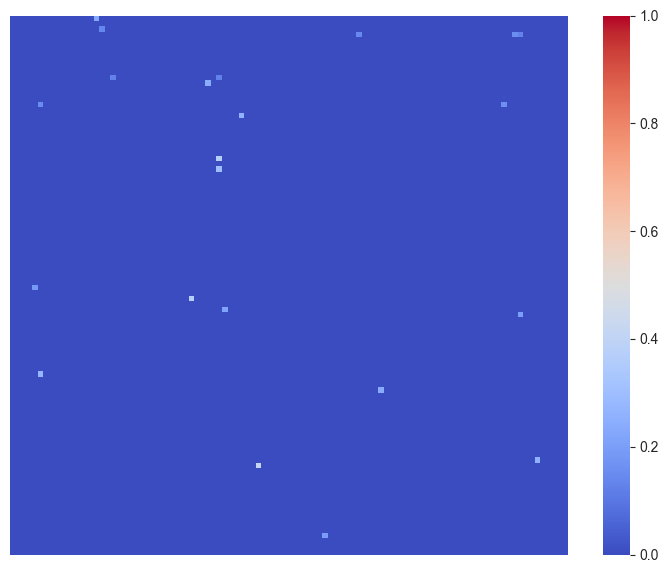

In [191]:
# Generate the TF-IDF matrix for the dataset
tfidf_vectorizer = TfidfVectorizer()
dataset_tfidf = tfidf_vectorizer.fit_transform(dataset['comment'])

# Visulize the first 100*100 elements of dataset_tfidf
plt.figure(figsize=(9, 7))
sns.heatmap(
    dataset_tfidf[:100, :100].toarray(),
    cmap="coolwarm",
    vmin=0,
    vmax=1,
    xticklabels = False, 
    yticklabels = False
)
plt.show()

In [192]:
'''
Count the total TD-IDF of each term in the dataset, 
then get the index from the highest to the lowest.
'''
tfidf_total = np.asarray(dataset_tfidf.sum(axis=0))[0]
sorted_total_index = sorted(range(len(tfidf_total)), key=lambda k: tfidf_total[k], reverse=True)

# Visulize for the first 300 frequent terms
fig = px.bar(
        x=tfidf_vectorizer.get_feature_names_out()[sorted_total_index[:300]],
        y=tfidf_total[sorted_total_index[:300]],
        labels={'x':'Term', 'y':'Total TF-IDF'},
)
fig.update_layout(xaxis_title="Terms",
                  yaxis_title="Total TF-IDF")
fig.show()


## 5.2 Data Mining

### 5.2.1 Separate Each Category

In [193]:
# Create TF-IDF DataFrame for each category
def create_TFIDF_df(df):
    tfidf_vectorizer = TfidfVectorizer()
    dataset_tfidf = tfidf_vectorizer.fit_transform(df['comment'])
    
    # Get the unique words (vocabulary) from the vectorizer
    words = tfidf_vectorizer.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    TFIDF = pd.DataFrame(dataset_tfidf.toarray(), columns=words)
    
    return TFIDF

# Create df for each category
dfs = {}

for category in categories:
    dfs[category] = dataset[dataset['sentiment'] == category].copy()

# Create TF-IDF DataFrames for each category
tfidfs = {}

for category in categories:
    tfidfs[category] = create_TFIDF_df(dfs[category])

In [194]:
tfidfs

{'not nostalgia':       00  000  045   10  100  10m   11   12   14   15  ...  youngest  \
 0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
 744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 746  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 747  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 748  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
 
      youngsters      your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
 0           0.0  0.0000

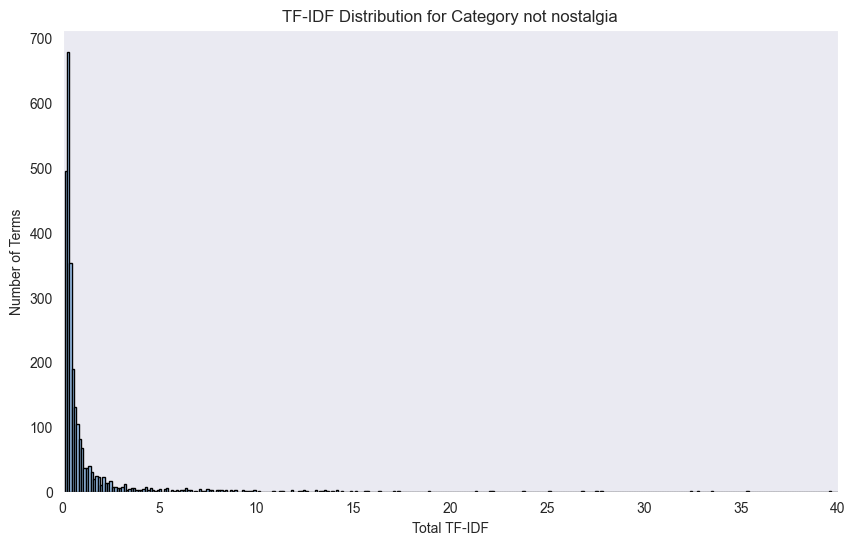

In [195]:
category_number = 0 # 0 or 1

# Visualize the total TF-IDF distribution
plt.figure(figsize=(10, 6))

# data: the TF-IDF of each term that appears in the category
plt.hist(
    tfidfs[categories[category_number]].sum(axis=0).to_numpy(), 
    bins=400,
    edgecolor='black'
)

plt.title(f'TF-IDF Distribution for Category {categories[category_number]}')
plt.xlabel('Total TF-IDF')
plt.ylabel('Number of Terms')
plt.xlim(0, 40) # only show frequencies [0, 50)

plt.show()

### 5.2.2 Noise Reduction
Here, I remove top **1%** and bottom **50%** words based on their total TF-IDF.

In [196]:
 # Filter the top 1% and bottom 5% words based on their amount across all documents
def noise_reduction_tfidf(TFIDF, top_percent = 0.01, bottom_percent = 0.5):
    # Calculate the amount of each word across all documents
    TFIDF_amount = TFIDF.sum(axis=0)
    
    # Sort the words by their amount
    sorted_words = TFIDF_amount.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 1% and bottom 50%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent * 100}% words: \n{sorted_words.head(bottom_n)}') #H ere we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent * 100}% words: \n{sorted_words.tail(top_n)}') # Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return TFIDF.drop(columns=words_to_remove)

# filter the noise for each category
filtered_tfidfs = {}

for category in categories:
    print(f'\nFor category {category} we filtered the following words:')
    filtered_tfidfs[category] = noise_reduction_tfidf(tfidfs[category])


For category not nostalgia we filtered the following words:
Bottom 50.0% words: 
excited          0.108236
following        0.142237
wondering        0.142237
67               0.142237
versa            0.142237
                   ...   
granddaughter    0.385211
chorus           0.385804
onions           0.386591
darn             0.386591
coincidence      0.386765
Length: 1301, dtype: float64
Top 1.0% words: 
beautiful    13.897911
me           14.170802
with         14.181376
voice        14.459626
he           14.877358
great        15.128684
have         15.676795
one          15.772953
like         16.402893
for          17.092886
so           17.350991
was          18.891399
music        21.331341
that         22.127652
love         22.258244
my           23.736244
in           25.151202
you          26.775628
is           27.534405
it           27.850826
of           32.450683
song         32.757274
to           33.544608
and          35.400242
this         39.569464
the        

### 5.2.3 Frequent Pattern Mining
1. Build up Database (set transaction threshold "> 0". If we set it ">= 1" then some comments will be filtered)
2. Run FPGrowth algotihm (here, I set minSup to be 4, due to the different cut point.)
3. Find Unique Pattern

Statistics for td_clean_tfidf_not_nostalgia.csv:
Database size (total no of transactions) : 749
Number of items : 1275
Minimum Transaction Size : 2
Average Transaction Size : 12.43124165554072
Maximum Transaction Size : 50
Standard Deviation Transaction Size : 6.600330629059249
Variance in Transaction Sizes : 43.622605541791906
Sparsity : 0.990250006544674

Statistics for td_clean_tfidf_nostalgia.csv:
Database size (total no of transactions) : 750
Number of items : 1126
Minimum Transaction Size : 1
Average Transaction Size : 13.289333333333333
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 8.803651868527187
Variance in Transaction Sizes : 77.6077632398754
Sparsity : 0.9881977501480166



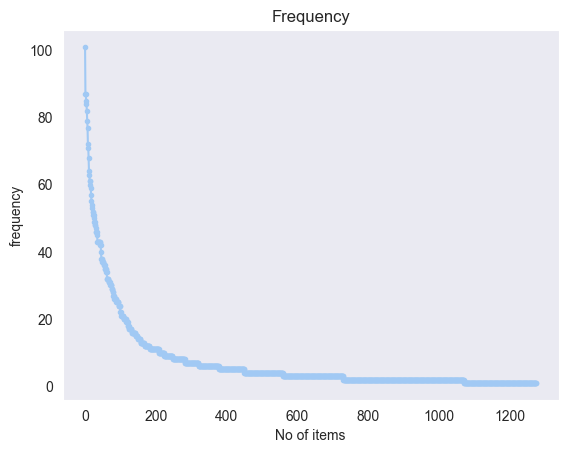

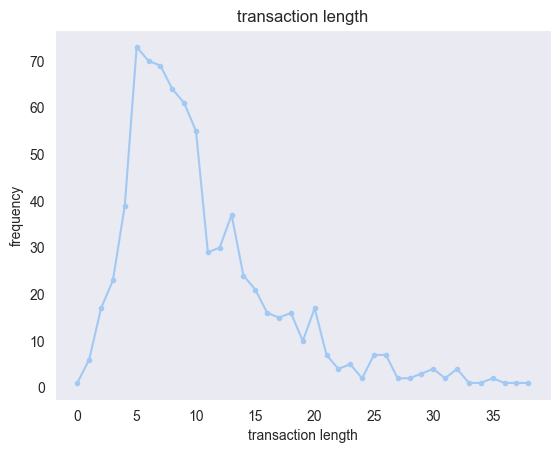

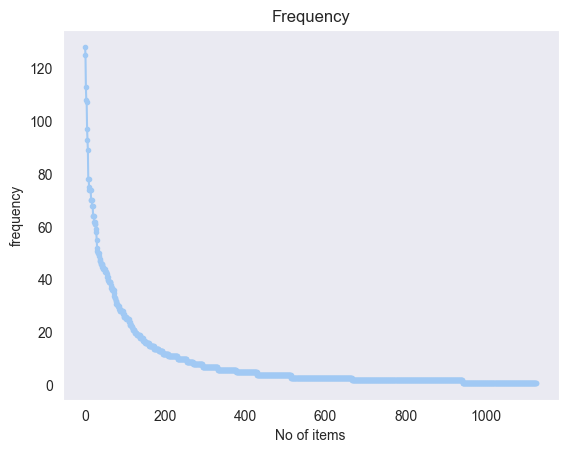

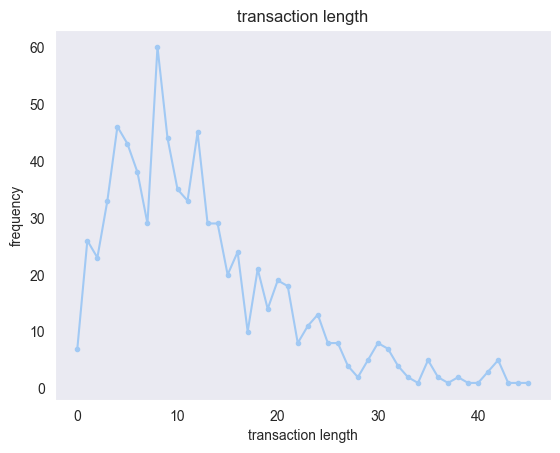

In [197]:
# Loop through the dictionary of term-document DataFrames
for category in filtered_tfidfs:
    # Replace space with underscore
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(filtered_tfidfs[category])                 
    
    # Save the transactional database to a CSV file
    obj.convert2TransactionalDatabase(f'td_clean_tfidf_{category_safe}.csv', '>', 0)

    # Load the transactional database and print the statistics
    obj = tds.TransactionalDatabase(f'td_clean_tfidf_{category_safe}.csv')
    print(f"Statistics for td_clean_tfidf_{category_safe}.csv:")
    obj.run()
    obj.printStats()
    print()
    obj.plotGraphs()

In [198]:
# Find the freqient patterns for each category
minSup = 18

obj = alg.FPGrowth(iFile=f'td_clean_tfidf_not_nostalgia.csv', minSup = minSup)
obj.mine() 
obj.save('freq_patterns_tfidf_not_nostalgia.txt') # save the patterns
fp_df_not_nostalgia_tfidf = obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(fp_df_not_nostalgia_tfidf ))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime
print()

obj = alg.FPGrowth(iFile=f'td_clean_tfidf_nostalgia.csv', minSup = minSup)
obj.mine() 
obj.save('freq_patterns_tfidf_nostalgia.txt') # save the patterns
fp_df_nostalgia_tfidf = obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(fp_df_nostalgia_tfidf ))) # print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 133
Runtime: 0.015373706817626953

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 202
Runtime: 0.020886898040771484


In [199]:
# We group together all of the dataframes related to our found patterns
fp_dfs_tfidf = [fp_df_not_nostalgia_tfidf, fp_df_nostalgia_tfidf]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in fp_dfs_tfidf:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1} # datatype: set

# Calculate the total number of patterns across all categories (including duplicates)
total_patterns_count = sum(len(df) for df in fp_dfs_tfidf)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_fp_dfs = []
for df in fp_dfs_tfidf:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_fp_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_tfidf = pd.concat(filtered_fp_dfs, ignore_index=True)

# Sort by support
final_pattern_df_tfidf = final_pattern_df_tfidf.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_tfidf)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

       Patterns  Support
161         for      125
158        that      113
150        with      107
146          is       97
143       great       93
..          ...      ...
111   just with       18
102     he with       18
139  music with       18
144   great for       18
151   with that       18

[163 rows x 2 columns]
Number of patterns discarded: 172


In [200]:
# Convert 'text' column into DTM
tdidf_vectorizer = TfidfVectorizer()
dataset_tfidf = tfidf_vectorizer.fit_transform(dataset['comment'])
terms = tfidf_vectorizer.get_feature_names_out()

# Tokenize the sentences into sets of unique words
dataset['tokenized_text'] = dataset['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=dataset.index, columns=final_pattern_df_tfidf['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df_tfidf['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = dataset['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the DTM to a DataFrame for easy merging
tfidf_df = pd.DataFrame(dataset_tfidf.toarray(), columns=terms, index=dataset.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df_tfidf = pd.concat([tfidf_df, pattern_matrix], axis=1)

augmented_df_tfidf

,00,000,045,07,10,100,10m,11,11th,12,...,record,have is,good days,as on,just for,just with,he with,music with,great for,with that
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### 5.2.4 Visualization with Dimensionality Reduction

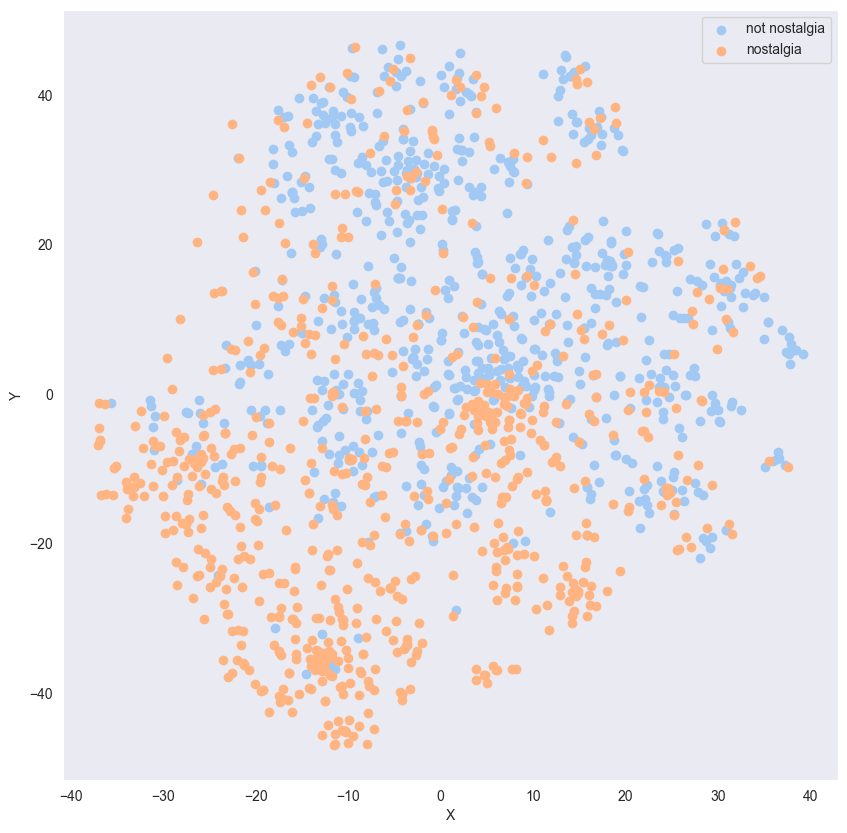

In [201]:
# calculate the t-SNE for the DTM
tfidf_tsne = TSNE(n_components=2).fit_transform(augmented_df_tfidf.values)
# get the cate
categories = dataset['sentiment'].unique() 
plt.figure(figsize=(10, 10))

for category in categories:
    plt.scatter(
        tfidf_tsne[dataset['sentiment'] == category].T[0],
        tfidf_tsne[dataset['sentiment'] == category].T[1],
        marker='o',
        label=category,
    )

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')

plt.show()

## 5.3 Data Classification

In [202]:
# Create a mapping from numerical labels to category names
category_mapping = dict(dataset[['label', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
data_train, data_test, label_train, label_test = train_test_split(augmented_df_tfidf, dataset['label'], test_size=0.3, random_state=42)

In [203]:
# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(data_train, label_train)

# Make predictions on the test set
label_pred = nb_classifier.predict(data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(label_test, label_pred))
print("\nClassification Report:\n", classification_report(label_test, label_pred, target_names=target_names, digits=4))

Accuracy: 0.8733333333333333

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8492    0.9185    0.8825       233
not nostalgia     0.9040    0.8249    0.8627       217

     accuracy                         0.8733       450
    macro avg     0.8766    0.8717    0.8726       450
 weighted avg     0.8756    0.8733    0.8729       450



In [204]:
# Train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(data_train, label_train)

# Make predictions on the test set
label_pred = nb_classifier.predict(data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(label_test, label_pred))
print("\nClassification Report:\n", classification_report(label_test, label_pred, target_names=target_names, digits=4))

Accuracy: 0.9088888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8871    0.9442    0.9148       233
not nostalgia     0.9356    0.8710    0.9021       217

     accuracy                         0.9089       450
    macro avg     0.9114    0.9076    0.9085       450
 weighted avg     0.9105    0.9089    0.9087       450



# 6. Report for the Fourth Instruction
1. Sampling is not necessary for the dataset.
2. Document-term matrix consumes significant resources. If we can make the matrix more dense (let all 0s be more meaningful) it would be better.
   (Especially, we often declare variable that is the copy of DTM, so it's more consumes the resources.)
   (Also, due to the sparsity, most graph we plotted are quite hard to analysis.) 
3. When we are filtering the outlier, we need to keep trial-and-error to find a best cut for i, j such that (top i%, bottom j%) data need to be eliminated.
   But in most of the case, the frequent terms are the same, so we might just utilize some library to filter out the stopwords.
   And we can just dispose the term that total occuring frequency in the corpus less than k (maybe k = 1).